<a href="https://colab.research.google.com/github/elias9080dm/XenoTox_Colab/blob/main/Prediccion_XenoTox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción multi blanco de xenobióticos**
Se utiliza el módulo multitargetqsar para predecir la activación de los receptores AHR, CAR y PXR.

Actualmente en resultados se muestra lo siguiente:
*   SMILES
*   Blanco molecular
*   Predicción (Activo / Inactivo)
*   Probabilidad (>0.5 = Activo, <0.5 = Inactivo)
*   Leverage (Similitud de las moléculas de entrenamiento)
*   AD_flag (Dentro / Fuera de AD)
*   Imagen de la molécula



In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 49.9 MB/s eta 0:00:00


In [1]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/QSAR')
from pathlib import Path

# Establecer carpeta padre
sys.path.append("/content/drive/MyDrive/QSAR/xenotox")

import os
from qsar.multitarget_qsar import MultiTargetQSAR

BASE_DIR = '/content/drive/MyDrive/QSAR/xenotox'

model_paths = {
    "AHR": os.path.join(BASE_DIR, "final_models", "xgb_ahr.pkl"), # Construct full path
    "CAR": os.path.join(BASE_DIR, "final_models", "xgb_car.pkl"),   # Construct full path
    "PXR": os.path.join(BASE_DIR, "final_models", "xgb_pxr.pkl")  # Construct full path
}


In [8]:
from IPython.display import HTML, display
import pandas as pd

def display_df_with_images(df, img_col="Molecule_Image", width=150):
    df_display = df.copy()

    if img_col in df_display.columns:
        df_display[img_col] = df_display[img_col].apply(
            lambda x: f'<img src="data:image/png;base64,{x}" width="{width}">' if pd.notnull(x) else ""
        )

    display(HTML(df_display.to_html(escape=False)))

,SMILES,Target,Prediction,Probability,Leverage,AD_Flag,Molecule_Image
0,C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl,AHR,Active,0.871116,0.042346,Inside AD,
1,C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl,CAR,Inactive,0.466793,0.048636,Inside AD,
2,C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl,PXR,Active,0.766039,0.043979,Inside AD,

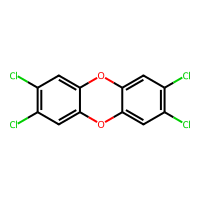
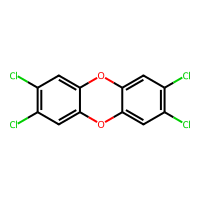
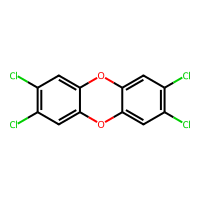

In [9]:
# Ejecución de MultiTargetQSAR
qsar = MultiTargetQSAR(model_paths)

results, invalid = qsar.predict([
    'C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl'
])

display_df_with_images(results)